In [9]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
plt.rcParams.update({'font.size': 18})

def eventfile_to_dict(file):
    output = {}
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag in output:
                output[v.tag].append(v.simple_value)
            else:
                output[v.tag] = [v.simple_value]
    return output

def plot_mean_std(x,ys,yerrors,labels):
    for i,label in enumerate(labels):
        plt.plot(x,ys[i])
        plt.fill_between(x,ys[i]-yerrors[i],ys[i]+yerrors[i],alpha=0.3,label=label)
    plt.legend()

## Question 1.3

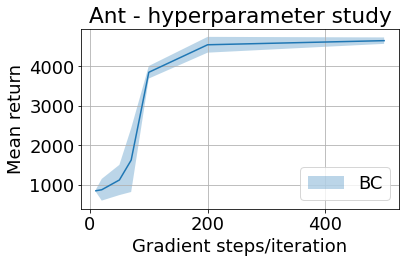

In [16]:
logdir = '../../data/q1_bc_ant_trainsteps*/events*'
trainsteps = [10,20,50,70,100,200,500]
eval_returns = np.zeros((len(trainsteps),2))
for eventfile in glob.glob(logdir):
    result = eventfile_to_dict(eventfile)
    trainstep = int(eventfile.split('_')[3][10:])
    eval_returns[trainsteps.index(trainstep)] = [result['Eval_AverageReturn'][0],result['Eval_StdReturn'][0]]
    
plot_mean_std(trainsteps,[eval_returns[:,0]],[eval_returns[:,1]],['BC'])
plt.xlabel('Gradient steps/iteration')
plt.ylabel('Mean return')
plt.title('Ant - hyperparameter study')
plt.grid()
plt.tight_layout()
# plt.show()
plt.savefig('../../report/q1.3_ant_hyperparam.png',dpi=100)

## Question 2.2

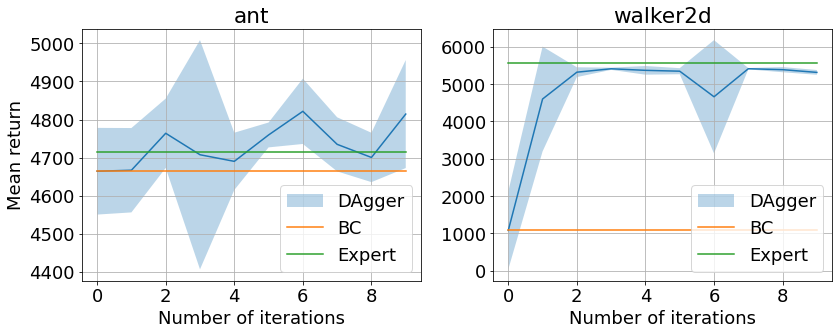

In [15]:
runs = ['ant','walker2d']
labels = ['DAgger']
plt.figure(figsize=(12,5))
for i,run in enumerate(runs):
    plt.subplot(1,2,i+1)
    logdir = f'../../data/q2_dagger_{run}_evalbatch5000_*/events*'
    result = eventfile_to_dict(glob.glob(logdir)[0])

    # DAgger
    eval_means = np.array([result['Eval_AverageReturn']])
    eval_stds= np.array([result['Eval_StdReturn']])
    n_iter = len(eval_means[0])
    plot_mean_std(range(n_iter),eval_means,eval_stds,labels)

    # BC & Expert
    plt.plot(result['Eval_AverageReturn'][0]*np.ones(n_iter),label='BC')
    plt.plot(result['Initial_DataCollection_AverageReturn'],label='Expert')
    plt.title(run)
    plt.xlabel('Number of iterations')
    if i == 0:
        plt.ylabel('Mean return')
    plt.legend(loc='lower right')
    plt.grid()
plt.tight_layout()
# plt.show()
plt.savefig('../../report/q2.2_dagger.png',dpi=100)

## Tests: relabel, evalbatch

['../../data/q2_dagger_walker2d_relabel_Walker2d-v4_11-09-2022_11-58-23/events.out.tfevents.1662922703.Nams-Air.localdomain']
['../../data/q2_dagger_walker2d_norelabel_Walker2d-v4_11-09-2022_11-51-23/events.out.tfevents.1662922283.Nams-Air.localdomain']


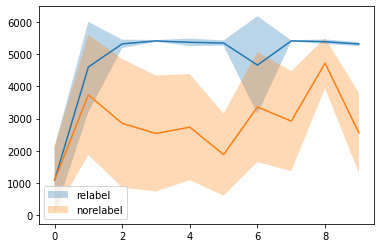

In [186]:
eval_means, eval_stds = [],[]
labels = ['relabel','norelabel']
for label in labels:
    logdir = f'../../data/q2_dagger_walker2d_{label}*/events*'
    print(glob.glob(logdir))
    result = eventfile_to_dict(glob.glob(logdir)[0])
    eval_means.append(result['Eval_AverageReturn'])
    eval_stds.append(result['Eval_StdReturn'])
eval_means = np.array(eval_means)
eval_stds = np.array(eval_stds)
plot_mean_std(range(len(eval_means[0])),eval_means,eval_stds,labels)


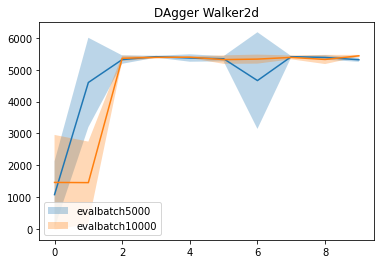

In [189]:
eval_means, eval_stds = [],[]
labels = ['evalbatch5000','evalbatch10000']
for label in labels:
    logdir = f'../../data/q2_dagger_walker2d_{label}*/events*'
    result = eventfile_to_dict(glob.glob(logdir)[0])
    eval_means.append(result['Eval_AverageReturn'])
    eval_stds.append(result['Eval_StdReturn'])
eval_means = np.array(eval_means)
eval_stds = np.array(eval_stds)
plot_mean_std(range(len(eval_means[0])),eval_means,eval_stds,labels)
plt.title('DAgger Walker2d')
plt.show()

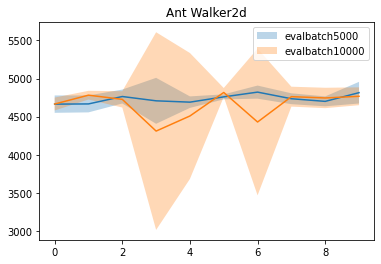

In [191]:
eval_means, eval_stds = [],[]
labels = ['evalbatch5000','evalbatch10000']
for label in labels:
    logdir = f'../../data/q2_dagger_ant_{label}*/events*'
    result = eventfile_to_dict(glob.glob(logdir)[0])
    eval_means.append(result['Eval_AverageReturn'])
    eval_stds.append(result['Eval_StdReturn'])
eval_means = np.array(eval_means)
eval_stds = np.array(eval_stds)
plot_mean_std(range(len(eval_means[0])),eval_means,eval_stds,labels)
plt.title('Ant Walker2d')
plt.show()

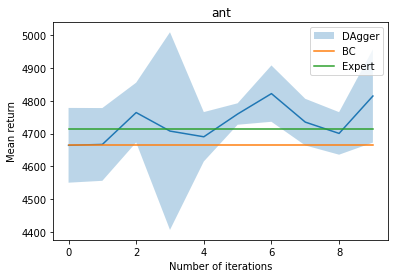

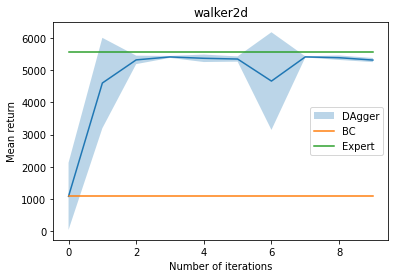